<a href="https://colab.research.google.com/github/Toshtosty/major-project-crack-classification/blob/main/segmentation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00


In [ ]:
import gdown
file_id = "1iQRpRfxv_5VB2OqY_5ij6jX6MbsHFLvk"
output_file = "Cracks_Segmentation.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1iQRpRfxv_5VB2OqY_5ij6jX6MbsHFLvk
From (redirected): https://drive.google.com/uc?id=1iQRpRfxv_5VB2OqY_5ij6jX6MbsHFLvk&confirm=t&uuid=93b3ad8c-b513-412e-9f3d-4d0a0c4dddbc
To: /content/Cracks_Segmentation.zip
100%|██████████| 126M/126M [00:03<00:00, 40.2MB/s]


'Cracks_Segmentation.zip'

In [ ]:
import zipfile
z = zipfile.ZipFile('/content/Cracks_Segmentation.zip')
z.extractall()

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 segmentation model
model = YOLO('yolov8x-seg.pt')

# First, let's verify the contents of the extracted directory
# This will help us confirm if data.yaml is where it's supposed to be
!ls -R Cracks_Segmentation/

model.train(
data='Cracks_Segmentation/data.yaml',
epochs=5,
imgsz=640,
batch=8,
name='Cracks_Segmentation_yolov8',
save=True,
save_period =- 1,
patience=20,
)

Streaming output truncated to the last 5000 lines.
3368.rf.e3712605c735d5a438cd9e80c3e63c92.jpg
3369.rf.86ae046a0a4ce5cb4c453e5ae4cf39f0.jpg
3369.rf.98e9384103fb86e66dd32934f1074909.jpg
3369.rf.f2faf01c9fa4d773d60023b22b597796.jpg
3370.rf.2df5e997b86b71537a231f5f788d2324.jpg
3370.rf.7e93d63fe4536498bef2dfeed6b6f4d1.jpg
3370.rf.93a97479d13bd588fc0494e81aaba2a8.jpg
3371.rf.1899433b4aace8eee4c9b7f5a4d345b3.jpg
3371.rf.84c4f3e6d57d60b7780d2f277b893de2.jpg
3371.rf.d762efec9a90eb44eef0180c8e150632.jpg
3372.rf.62ce3e887c25f9e9b88746ebbb4bbe94.jpg
3372.rf.7b674f57b34fb56c977774346e0f98f8.jpg
3372.rf.7fde1ab324224ecadf03b6ee2f53733f.jpg
3374.rf.babff350bc540537abf1a574cae5064a.jpg
3374.rf.e1213214ee32443ac1f50c03b8709a6c.jpg
3374.rf.ebac23d0d245fc4cc1abe88392c6c2d5.jpg
3375.rf.5a894ed894f138f7eb2b64edbfed5b1f.jpg
3375.rf.cc790423f6fa98c367f3386c88e43bbf.jpg
3375.rf.e92252b1e889e8b396f2cea7ed1e4c9f.jpg
3377.rf.0661c48999ecdeea01b639e94a2b71b2.jpg
3377.rf.50d5afac29c56371f3c95db4655eacb7.jpg
3377

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7808684cdfd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
import numpy as np

def draw_segmentation(image, mask, class_colors, gamma = 0, alpha=0.5):

    overlay = np.zeros_like(image, dtype=np.uint8)

# Color only class regions (excluding background)
    for class_id, color in class_colors.items():
        if class_id == 0:
            continue # Skip background
        class_mask = (mask == class_id)
        overlay[class_mask] = color

# Create a mask where any class 0
    object_mask = (mask != 0)

# Blend only the object region
    blended_image = image. copy()

    blended_image[object_mask] = cv2.addWeighted(
        image[object_mask], 1 - alpha, overlay[object_mask], alpha, gamma
    )
    return blended_image


image 1/1 /content/Cracks_Segmentation/test/images/2084.rf.950ff4fcd9bc177e7831cb4c9a2dd6eb.jpg: 640x640 1 crack, 80.9ms
Speed: 2.9ms preprocess, 80.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Cracks_Segmentation/test/images/3443.rf.ae3196f72376757297122e81626f6f60.jpg: 640x640 2 cracks, 71.8ms
Speed: 2.5ms preprocess, 71.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Cracks_Segmentation/test/images/1616.rf.c868709931a671796794fdbb95352c5a.jpg: 640x640 3 cracks, 72.4ms
Speed: 2.3ms preprocess, 72.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Cracks_Segmentation/test/images/2252.rf.87849e818065fa8392978ab64926d339.jpg: 640x640 1 crack, 68.3ms
Speed: 2.5ms preprocess, 68.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Cracks_Segmentation/test/images/3259.rf.a92a5f313a7c48a2a4e7973db4fb19e2.jpg: 640x640 1 crack, 71.1ms


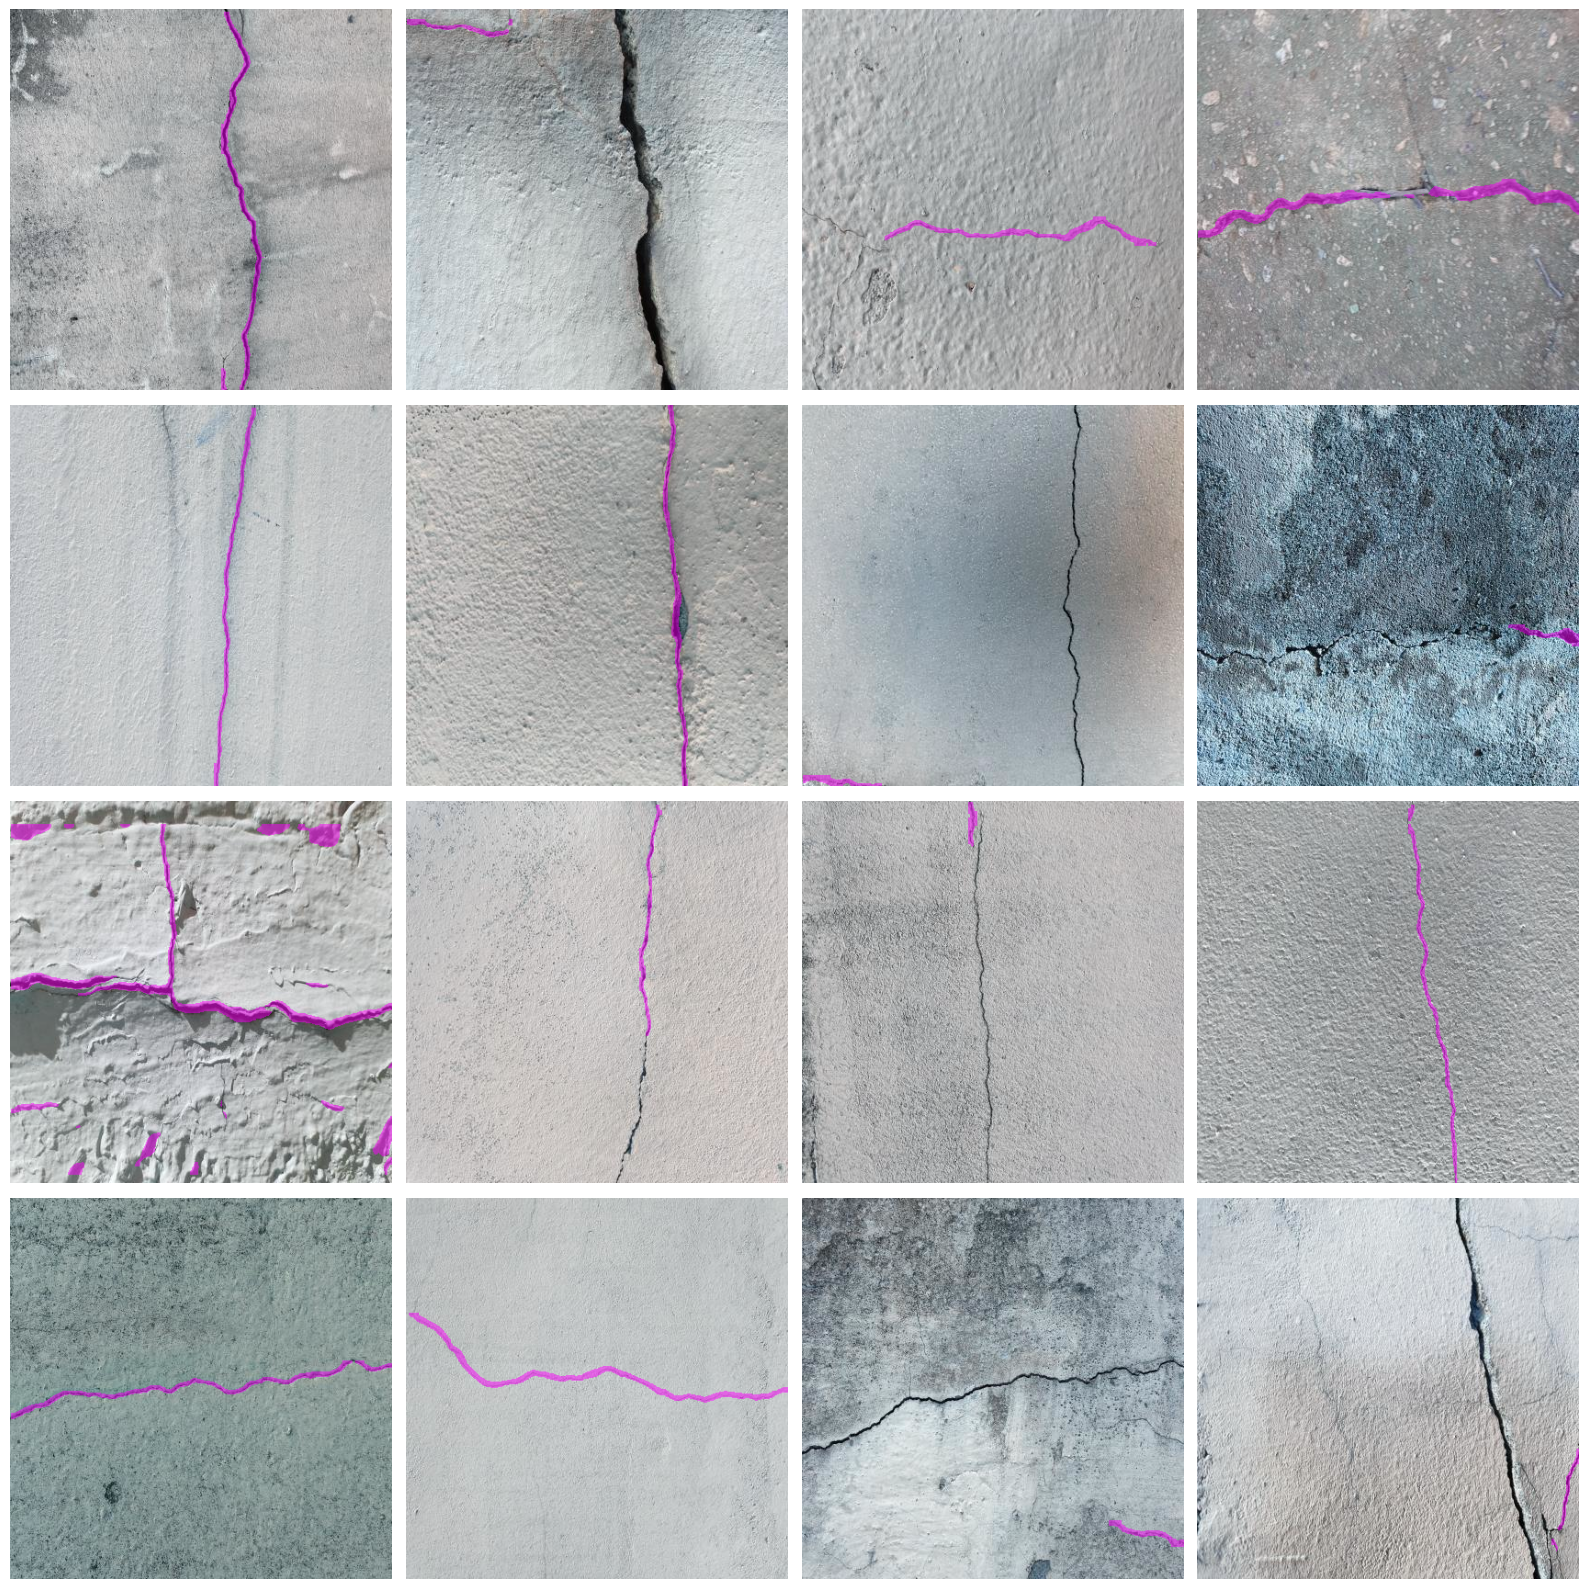

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('runs/segment/Cracks_Segmentation_yolov82/weights/best.pt')

# Test images directory
test_images_dir = 'Cracks_Segmentation/test/images'

# Define colors for visualization
color_sample = {
0 : (0, 0, 0),
1 : (255, 0,255),
}
image_files = os.listdir(test_images_dir)

fig, ax = plt.subplots(4,4,figsize=(16,16))
ax = ax.ravel()
for idx in range(16):
  img_name = random.choice(image_files)
  img_path = os.path.join(test_images_dir, img_name)
  image = cv2.imread(img_path)
  # Convert BGR to RGB for plotting
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform inference
  results = model(img_path) [0]
# print(results)

  if results.masks:
# Draw segmentation masks
    for seg in results.masks.data:
        mask = seg.cpu().numpy()
# Resize mask to match image dimensions
        mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))

        image = draw_segmentation(image_rgb, mask_resized, color_sample)
  image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Plot the image
  ax[idx].imshow(image_rgb)
  ax[idx].axis('off')

plt.tight_layout()
plt.show()